In [330]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

np.set_printoptions(suppress=True, linewidth=200, precision=5)

**Opgave 1**

In [331]:
matrix = np.array([[3, 1, 1, 1],
                   [2, 0, 1, 1],
                   [1, 2, 0, -1]], dtype=float)

matrix[0, :] *= 1/3.0
matrix[1, :] = matrix[1, :] - 2*matrix[0, :]
matrix[2, :] = matrix[2, :] - 1*matrix[0, :]
matrix[1, :] *= 1/(-2/3)
matrix[0, :] = matrix[0, :] - 1/3*matrix[1, :]
matrix[2, :] = matrix[2, :] - (5/3)*matrix[1, :]
matrix[2, :] *= 1/(1/2)
matrix[0, :] = matrix[0, :] - (1/2)*matrix[2, :]
matrix[1, :] = matrix[1, :] - (-1/2)*matrix[2, :]
print(matrix)

[[ 1.  0.  0.  1.]
 [ 0.  1.  0. -1.]
 [ 0.  0.  1. -1.]]


Derved får vi at vores koordinatvektorer er lig med $\begin{bmatrix} 1 \\ -1 \\ -1 \end{bmatrix}$

**Opgave 2**

Ud fra de informationer vi i opgaven, kan vi ifølge definitionen af en grammatrice (afsnit 9.3) konkludere, at alle indgange undtagen for diagonalen bliver lig med 0. Vi ved dog ikke, hvad for tal der vil være på diagonalen, derfor er svaret en diagonalmatrix og ikke en identitetsmatrix.

**Opgave 3**

Her skal vi løse den raw echelon form af matrixen:
$$
\begin{bmatrix}
1 & 1 & 0 & -2 \\
1 & -1 & 2 & 0 \\
0 & 1 & -1 & -1
\end{bmatrix}
$$

In [332]:
a = np.array([[1,1,0,-2],[1,-1,2,0],[0,1,-1,-1]])

a[0, :] = (1/1.0) * a[0,:]
a[1, :] = a[1, :] - a[0, :] * 1.0
a[2, :] = a[2, :] - 0.0 * a[0, :]
a[1, :] = a[1, :] * (1/-2.0)
a[0, :] = a[0,:] - 1.0 * a[1, :]
a[2, :] = a[2, :]- 1.0 * a[1, :]
a[0,:] = a[0,:] - 1.0 * a[2, :]
a[1, :] = a[1, :] -1.0 * a[2,:]

print(a)


[[ 1  0  1 -1]
 [ 0  1 -1 -1]
 [ 0  0  0  0]]


hvilket vi omstiller til et ligningsystem. Allerede før det kan der ses at søjle 0 og 1 indeholder et pivot hvilket betyder at søjle 2 og 3 er frie variabler:
$$
x_0 + x_2 - x_3 = 0 \\
x_1 - x_2 - x_3 = 0
$$
Hvilket vi så løser i forhold til nulrummet:
$$
\begin{bmatrix}
x_0 \\
x_1 \\
x_2 \\
x_3
\end{bmatrix} =
\begin{bmatrix}
-x_2 + x_3 \\
x_2 + x_3 \\
x_2 \\
x_3
\end{bmatrix} = 
x_2
\begin{bmatrix}
-1 \\
1 \\
1 \\
0
\end{bmatrix}
x_3
\begin{bmatrix} 
1 \\
1 \\
0 \\
1
\end{bmatrix}
$$
Hvilket betyder at $$ \begin{bmatrix}
-1 \\
1 \\
1 \\
0
\end{bmatrix} \begin{bmatrix} 
1 \\
1 \\
0 \\
1
\end{bmatrix}$$
Er vores nulrum for A

**Opgave 4**

Vi får at vide, at vi har to vektorer u og v i $R^{100}$, med $v \neq 0$, og at projektionen af u langs v kan beregnes med funktionen proj-på. Vi bruger Tabel 5.1 til at se, hvad omkostningerne er for de enkelte operationer. Vi ser, at vi har to Række-søjleprodukter (np.vdot), som begge tæller 2n, dvs $2 \cdot 100$. Derfor har vi 400 flops indtil videre. Dernæst har vi til sidst et skalar-vektorprodukt, som tæller n flops, dvs. vi har 500 flops nu. Til sidst skal der også tages hensyn til division, som tæller en enkelt flop, dvs. vi ender med 501 flops, som er svar D.

**Opgave 5**

In [333]:
# delopgave a)

u_0 = np.array([1, 1, 1, 1])
u_1 = np.array([1, 0, 1, 0])
u_2 = np.array([1, 1, -1, 1])

# Vinkel mellem vektor u_0 og u_2 findes med cos(theta)

cos_theta = ( np.dot(u_0, u_2) / (np.linalg.norm(u_0) * np.linalg.norm(u_2)) )
# Angives i radianer
theta = np.arccos(cos_theta)

# Brug np.degrees(theta) hvis det skal angives i grader

print(np.degrees(theta))

59.99999999999999


In [334]:
# delopgave b)

rMatrix = [[1, 1, 1],
          [1, 0, 1],
          [1, 1, -1],
          [1, 0, 1]]

$$
\left[\begin{matrix}1.0 & 0 & 0\\0 & 1.0 & 0\\0 & 0 & 1.0\\0 & 0 & 0\end{matrix}\right]
$$
Vi ser at søjle 0, 1, 2 har pivot elementer. Derfor er samlingen lineært uafhængigt ifølge definition 14.2.

In [335]:
# delopgave c)

Matrix = np.array([[1, 1, 1], [1, 0, 1], [1, 1, -1], [1, 0, 1]])

u_0 = np.array([[1], [1], [1], [1]])
u_1 = np.array([[1], [0], [1], [0]])
u_2 = np.array([[1], [1], [-1], [1]])

# Forbedret Gram-Schmidt proces

v_0 = u_0 / np.linalg.norm(u_0)
print(v_0)

v_1 = u_1 - (v_0.T @ u_1) * v_0
v_1 = v_1 / np.linalg.norm(v_1)
print(v_1)

v_2 = u_2 - (v_0.T @ u_2) * v_0 - (v_1.T @ u_2) * v_1
v_2 = v_2 / np.linalg.norm(v_2)
print(v_2)

[[0.5]
 [0.5]
 [0.5]
 [0.5]]
[[ 0.5]
 [-0.5]
 [ 0.5]
 [-0.5]]
[[ 0.70711]
 [ 0.     ]
 [-0.70711]
 [ 0.     ]]


Her har vi tre vektorer der tilsammen giver en ortonormal samling $v_0, v_1, v_2$, som udspænder det samme rum. (Hvis det skulle være en basis, så kunne man bruge 9.10).

In [336]:
# delopgave d)

print(np.dot(v_2.T, u_0))

print(1.0 * 0.70710678 + 1.0 * 0 + 1.0 * -0.70710678 + 1.0 * 0)

[[0.]]
0.0


Her beregner vi bare det indre produkt mellem $v_2$ og $u_0$ ved brug af afsnit 8.1. Resultatet er som vist ovenfor. Matematikken er vist nedenfor:
$$ 
\langle u,v \rangle = u^T \cdot v \\
\langle u,v \rangle = 1.0 \cdot 0.70710678 + 1.0 \cdot 0 + 1.0 -0.70710678 + 1.0 \cdot 0 = 0
$$

**Opgave 6**

Her en forklaring af vander: $\\$
x = np.array([1, 2, 3, 5]) $\\$
N = 3 $\\$
np.vander(x, N) $\\$
array([[ 1,  1,  1], $\\$
       [ 4,  2,  1], $\\$
       [ 9,  3,  1], $\\$
       [25,  5,  1]]) $\\$
Første argument er altså vores matrix, imens anden angiver hvor mange potenser. I dette tilfælde er det tre potenser, dvs i 0, 1 og anden tages værdierne og opstilles i nye rækker.

In [337]:
# delopgave a)
 
x = [-0.01, 1.04, 1.31, 1.95, 2.58, 3.28, 3.86]
y = [0.13, 2.77, 3.12, 2.93, 1.43, -0.01, -1.76]

A = np.vander(x, 3)
print(A)

[[ 0.0001 -0.01    1.    ]
 [ 1.0816  1.04    1.    ]
 [ 1.7161  1.31    1.    ]
 [ 3.8025  1.95    1.    ]
 [ 6.6564  2.58    1.    ]
 [10.7584  3.28    1.    ]
 [14.8996  3.86    1.    ]]


Hvis vi bruger np.vander på vores x-værdier, får vi ovenstående matrix. Derefter kan vi bruge np.size på matricen og får at den er 21, dvs. $R^{7 \times 3}$ og w og v har størrelse $R^{3}$ og $R^{7}$ henholdsvis. I forhold til datapunkterne, svarer w til x-værdierne, imens v svarer til y-værdierne. I forhold til p(x), svarer y til p(x) selv, altså venstre side af ligningen, imens w svarer til b,  c, d osv. i ligningen.

In [338]:
# delopgave b)

U, s, Vt = np.linalg.svd(A, full_matrices=False)

In [339]:
print(U)

[[-0.00438  0.34515  0.87458]
 [-0.06788  0.50211  0.04591]
 [-0.10038  0.50099 -0.08745]
 [-0.20381  0.43055 -0.2733 ]
 [-0.34192  0.26809 -0.27726]
 [-0.53759 -0.02077 -0.07342]
 [-0.73338 -0.34652  0.26154]]


In [340]:
print(s)

[21.00392  2.19736  0.73786]


In [341]:
print(Vt)

[[-0.95255 -0.28927 -0.09471]
 [-0.25574  0.59188  0.76437]
 [ 0.16505 -0.75233  0.63778]]


Vi ved at s angiver singulærværdierne, så de er:
$$
\begin{bmatrix}
    21.00392 \\
    2.19736 \\
    0.73786
\end{bmatrix}
$$
Dem kan vi nu bruge til at beregne konditionstallet k(A) som vist i ligning 11.10 i afsnit 11:
$$
\kappa(A) = \frac{\sigma_0}{\sigma_{k-1}}
$$

In [342]:
kA = s[0] / s[-1]
print(kA)

28.465832727545795


Så k(A) er lig med 28.465832727545795.

In [343]:
# delopgave c)

# Vi bruger ligning 16.5 til at finde x
S_inv = np.diag(1 / s)
pseudo_inv = np.dot(Vt.T, np.dot(S_inv, U.T))
koefficient = np.dot(pseudo_inv, y)

print(koefficient)

[-0.976    3.14108  0.36918]


In [344]:
# Denne kode findes i afsnit 16.4

restvektor = y - A @ koefficient
print(np.linalg.norm(restvektor))
print(restvektor)

0.7824296410553826
[-0.20767  0.18974  0.31092  0.14696 -0.54651 -0.18171  0.28827]


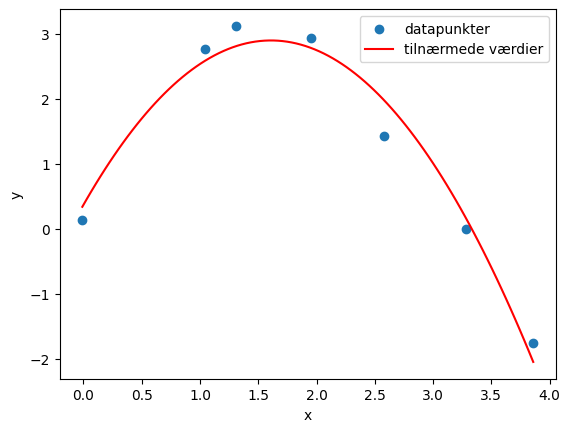

In [345]:
values = np.linspace(min(x), max(x), 100)
new_A = np.vander(values, 3)
plot = np.dot(new_A, koefficient)

plt.scatter(x, y, label='datapunkter')
plt.plot(values, plot, color='red', label='tilnærmede værdier')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**Opgave 7**

delopgave a) $\\$
Vi bruger $det(A - \lambda I_n) = 0$ til at se, om $\lambda_0 = 5$ er en egenværdi af A:
$$
\begin{bmatrix}
    5 - 5 & 0 & 0 \\
    1 & 1 - 5 & 1 \\
    2 & 3 & -1 - 5 
\end{bmatrix} =
\begin{bmatrix}
    0 & 0 & 0 \\
    1 & - 4 & 1 \\
    2 & 3 & - 6 
\end{bmatrix}
$$
Vi ser, at første række er lig 0, så der er højst to pivot elementer, dvs. 5 er en egenværdi for A. Vi kan finde en egenvektor for denne egenværdi ved at finde row echelonform af matricen, hvor $lambda_0 = 5$ blev indsættet:
$$
\begin{bmatrix}
    1.0 & 0 & -1.90909090909091 \\
    0 & 1.0 & -0.727272727272727 \\
    0 & 0 & 0
\end{bmatrix}
$$
Nu kan vi løse systemet efter at sætte det lig med nul:
$$
x_0 - 21/11x_2 = 0 \\
x_1 - 8/11x_2 = 0
$$
$$
x_0 = 21/11x_2 \\
x_1 = 8/11x_2
$$

Vi ser, at x_2 er en fri variabel, som kan antage flere værdier. Dvs. vi kan f.eks. antage $x_2 = 11$ (med fordel) for at få lige tal i vektoren. Med denne antagelse, får vi så til sidst vektoren:
$$
v_0 = \begin{bmatrix}
    21 \\
    8 \\
    11
\end{bmatrix}
$$
da vi indsætter 11 i $x_2$ plads og derefter ser, at $x_0$ og $x_1$ får ovenstående værdier.

delopgave b) $\\$
Vi har formlen $Av = \lambda v$ fra def 21.1, som vi kan bruge til at finde egenværdi ud fra egenvektorer:
$$
\begin{bmatrix}
    5 & 0 & 0 \\
    1 & 1 & 1 \\
    2 & 3 & -1 
\end{bmatrix} \begin{bmatrix}
    0 \\
    1 \\
    1
\end{bmatrix} = 
\begin{bmatrix}
    0 \\
    2 \\
    2
\end{bmatrix} = 
\lambda \begin{bmatrix}
    0 \\
    1 \\
    1 
\end{bmatrix} = 
2 \begin{bmatrix}
    0 \\
    1 \\
    1
\end{bmatrix}
$$
Dvs. vores egenværdi er $\lambda = 2$.

In [367]:
# delopgave c)

a = np.array([[5, 0, 0], 
              [1, 1, 1], 
              [2, 3, -1]])

def potens_skridt(a, w):
    v = a @ w
    v /= np.linalg.norm(v)
    lambda_ny = np.vdot(v, a @ v)
    return lambda_ny, v

rng = np.random.default_rng()

m, _ = a.shape
w = rng.standard_normal((m, 1))
n = 20
lambda_o = np.zeros(n)

for k in range(n):
    lambda_o[k], w = potens_skridt(a, w)

print(lambda_o)

[2.28916 4.79011 4.50583 5.01783 4.92956 5.0044  4.98905 5.00074 4.99826 5.00012 4.99972 5.00002 4.99996 5.      4.99999 5.      5.      5.      5.      5.     ]


Text(0, 0.5, 'lambda_out[k]')

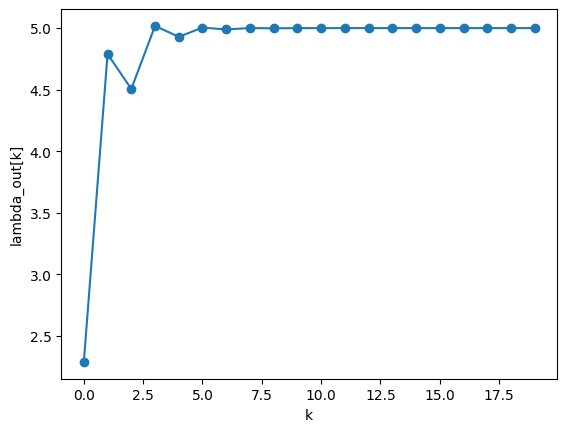

In [368]:
fig, ax = plt.subplots()
ax.plot(lambda_o, '-o')
ax.set_xlabel('k')
ax.set_ylabel('lambda_out[k]')

In [370]:
print('A w :')
print(a @ w)
print('Sidste lambda ganget på w :')
print(lambda_o[-1] * w)
print('Relativ fejl:')
print(np.linalg.norm(a @ w - lambda_o[-1] * w)
/ np.linalg.norm(w))

A w :
[[ 0.     ]
 [-0.56695]
 [ 2.02424]]
Sidste lambda ganget på w :
[[ 0.     ]
 [ 1.82162]
 [-4.65636]]
Relativ fejl:
7.094769152652526


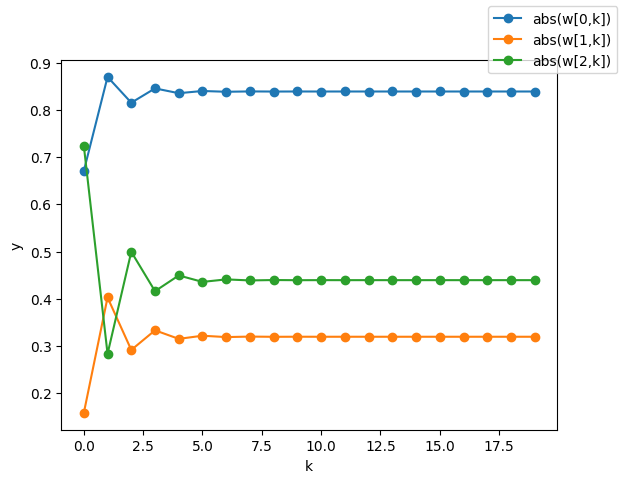

In [390]:
m, _ = a.shape
w = rng.standard_normal((m, 1))
n = 20
lambda_out = np.zeros(n)
w_out = np.zeros((m, n))


for k in range(n):
    lambda_out[k], w = potens_skridt(a, w)
    w_out[:, [k]] = w

fig, ax = plt.subplots()
for i in range(m):
    ax.plot(np.abs(w_out[i, :]), '-o', label=f'abs(w[{i},k])')
ax.set_xlabel('k')
ax.set_ylabel('y')
fig.legend()

In [435]:
def inv_potens_skridt(a, w, mu):
    m, _ = a.shape
    v = np.linalg.solve(a - mu * np.eye(m), w)
    v /= np.linalg.norm(v)
    lambda_ny = np.vdot(v, a @ v)
    return lambda_ny, v

mu = -1

rng = np.random.default_rng()

m, _ = a.shape
w = rng.standard_normal((m, 1))
w /= np.linalg.norm(w)

n = 20
lambda_out = np.empty(n)

for i in range(n):
    lambda_out[i], w = inv_potens_skridt(a, w, mu)

print(lambda_out)

[-1.55441 -2.03464 -1.99773 -1.99891 -2.00066 -1.99973 -2.0001  -1.99997 -2.00001 -2.      -2.      -2.      -2.      -2.      -2.      -2.      -2.      -2.      -2.      -2.     ]


In [437]:
machine_epsilon = np.finfo(float).eps
print(np.allclose(a @ w, lambda_out[-1] * w,
atol = machine_epsilon))

False


Nu kan vi indsætte -2 ind i matricen som vores $\lambda$ for at tjekke, om den holder og hvad dens egenvektor er:
$$
A = \begin{bmatrix}
    5 - -2 & 0 & 0 \\
    1 & 1 - - 2 & 1 \\
    2 & 3 & -1 -2 
\end{bmatrix} = \begin{bmatrix}
    7 & 0 & 0 \\
    1 & 3 & 1 \\
    2 & 3 & 1
\end{bmatrix}
$$
Vi finder row echelonform af denne matrix:
$$
\begin{matrix}
    1.0 & 0 & 0 \\
    0 & 1.0 & 0.333333333333333 \\
    0 & 0 & 0
    \end{matrix}
$$
Vi kan se, at sidste række er en nul-række, dvs vi kan maks have 2 pivot elementer og dermed er -2 en egenværdi. For at finde egenvektoren, omskriver vi til ligningssystem og sætter lig med nul:
$$
x_0 = 0 \\
x_1 + 1/3x_2 = 0 \\
0 = 0
$$
Vi kan se, at $x_2$ er en fri variabel, så vi kan antage en værdi, som vi vælger for at være -3, for den:
$$
\begin{bmatrix}
    0 \\
    1 \\
    -3
\end{bmatrix}
$$
som er egenvektoren for egenværdien $\lambda_2 = -2$.

In [438]:
v_2 = np.array([0, 1, -3])[:, np.newaxis]

længde = v_2 / np.linalg.norm(v_2)
print(længde)

[[ 0.     ]
 [ 0.31623]
 [-0.94868]]
